In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Observation
1.Above is our dataset which contains attributes with the help of which we have to predict insurance claim fraud detection.

2.It has 1000 rows and 40 columns.

3.Our target variable has 2 classes so this is our binary classification problem.

In [4]:
#let's remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(1000, 40)

In [5]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Observation
1.There are no nulls in our dataset.

2.In column _c39 ,all entries are nulls so it is of no use so we can drop it off

In [6]:
#let's drop _c39 column
df.drop('_c39',axis=1,inplace=True)
df.shape

(1000, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
#let's check value counts for each column
for col in df:
    print('Value count of ',[col] ,df[col].value_counts())
    /n:

Value count of  ['months_as_customer'] 194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
Value count of  ['age'] 43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
Value count of  ['policy_number'] 521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
Value count of  ['policy_bind_date'] 01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
0

# Observation
1.From here we can see value counts of each column and unique values in those columns.

2.After analyzing the data some columns are not necessary for prediction,they are
policy_number,insured_zip,auto_make,auto_model,auto_year,Total_claim_amount,Insured_hobbies because there are other columns for these details

so let's drop them off

In [9]:
df.drop(columns=['policy_number','insured_zip','auto_make','auto_model','auto_year','total_claim_amount','insured_hobbies'],axis=1,inplace=True)
df.shape

(1000, 32)

In [10]:
#let's drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(1000, 32)

In [11]:
#changing dtype of date
df['policy_bind_date']=pd.to_datetime(df.policy_bind_date)
df['incident_date']=pd.to_datetime(df.incident_date)
#fetching date ,month,year separately from policy_bind_date and incident_date column
df['Month']=df['policy_bind_date'].apply(lambda x:x.month)
df['Day']=df['policy_bind_date'].apply(lambda x:x.day)
df['Year']=df['policy_bind_date'].apply(lambda x:x.year)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_sex                  1000 non-null   object        
 9   insured_education_level      1000 non-null   object        
 10  insured_occupation           1000 non-null   object        
 11  insured_relationship         1000 non-null  

In [12]:
df['Incident Month']=df['incident_date'].apply(lambda x:x.month)
df['Incident Day']=df['incident_date'].apply(lambda x:x.day)
df['Incident Year']=df['incident_date'].apply(lambda x:x.year)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_sex                  1000 non-null   object        
 9   insured_education_level      1000 non-null   object        
 10  insured_occupation           1000 non-null   object        
 11  insured_relationship         1000 non-null  

In [13]:
#let's drop policy date and incident date column
df.drop(columns=['policy_bind_date','incident_date'],axis=1,inplace=True)
df.shape

(1000, 36)

In [14]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,Month,Day,Year,Incident Month,Incident Day,Incident Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,7433.420000,7399.570000,37928.950000,6.559000,15.448000,2001.604000,3.407000,13.08400,2015.0
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,4880.951853,4824.726179,18886.252893,3.391758,8.850176,7.360391,3.276291,10.44318,0.0
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,1.000000,1990.000000,1.000000,1.00000,2015.0
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,4295.000000,4445.000000,30292.500000,4.000000,8.000000,1995.000000,1.000000,2.00000,2015.0
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,6775.000000,6750.000000,42100.000000,7.000000,16.000000,2002.000000,2.000000,15.00000,2015.0
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,11305.000000,10885.000000,50822.500000,9.000000,23.000000,2008.000000,5.000000,22.00000,2015.0
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,12.000000,31.000000,2015.000000,12.000000,31.00000,2015.0


# Observation
1.Mean is greater than median for months_as_customer,capital_gains,injury_claim,property_claim it means data is right skewed.

2.mean is less than median for capital_loss,vehicle_claim it means data is left skewed.

We can observe other statistics as well

In [15]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [16]:
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

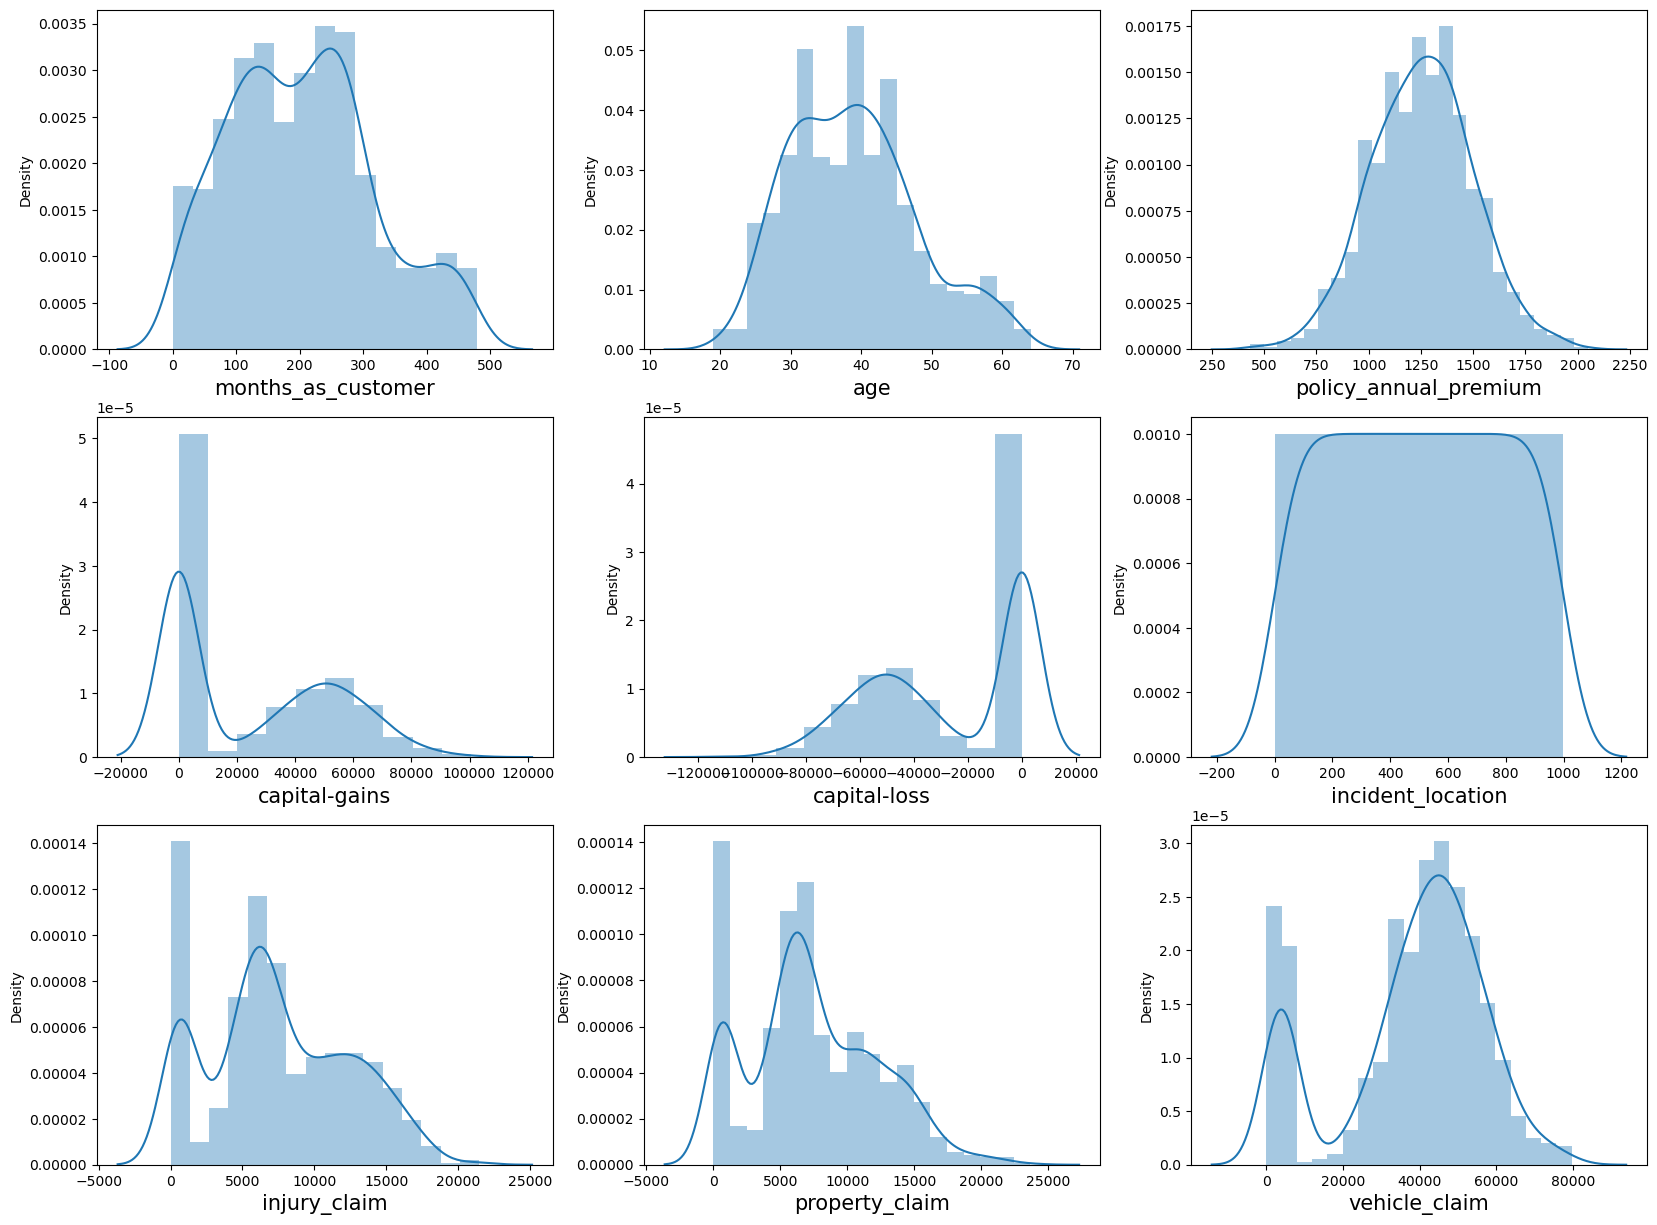

In [17]:
#lets build distplot to check dist for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['months_as_customer','age','policy_annual_premium','capital-gains','capital-loss','incident_location','injury_claim','property_claim','vehicle_claim']]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
1.Distribution looks good except for capital-gains and capital-loss column and there seems to have some skewness also

Let's check for outliers also

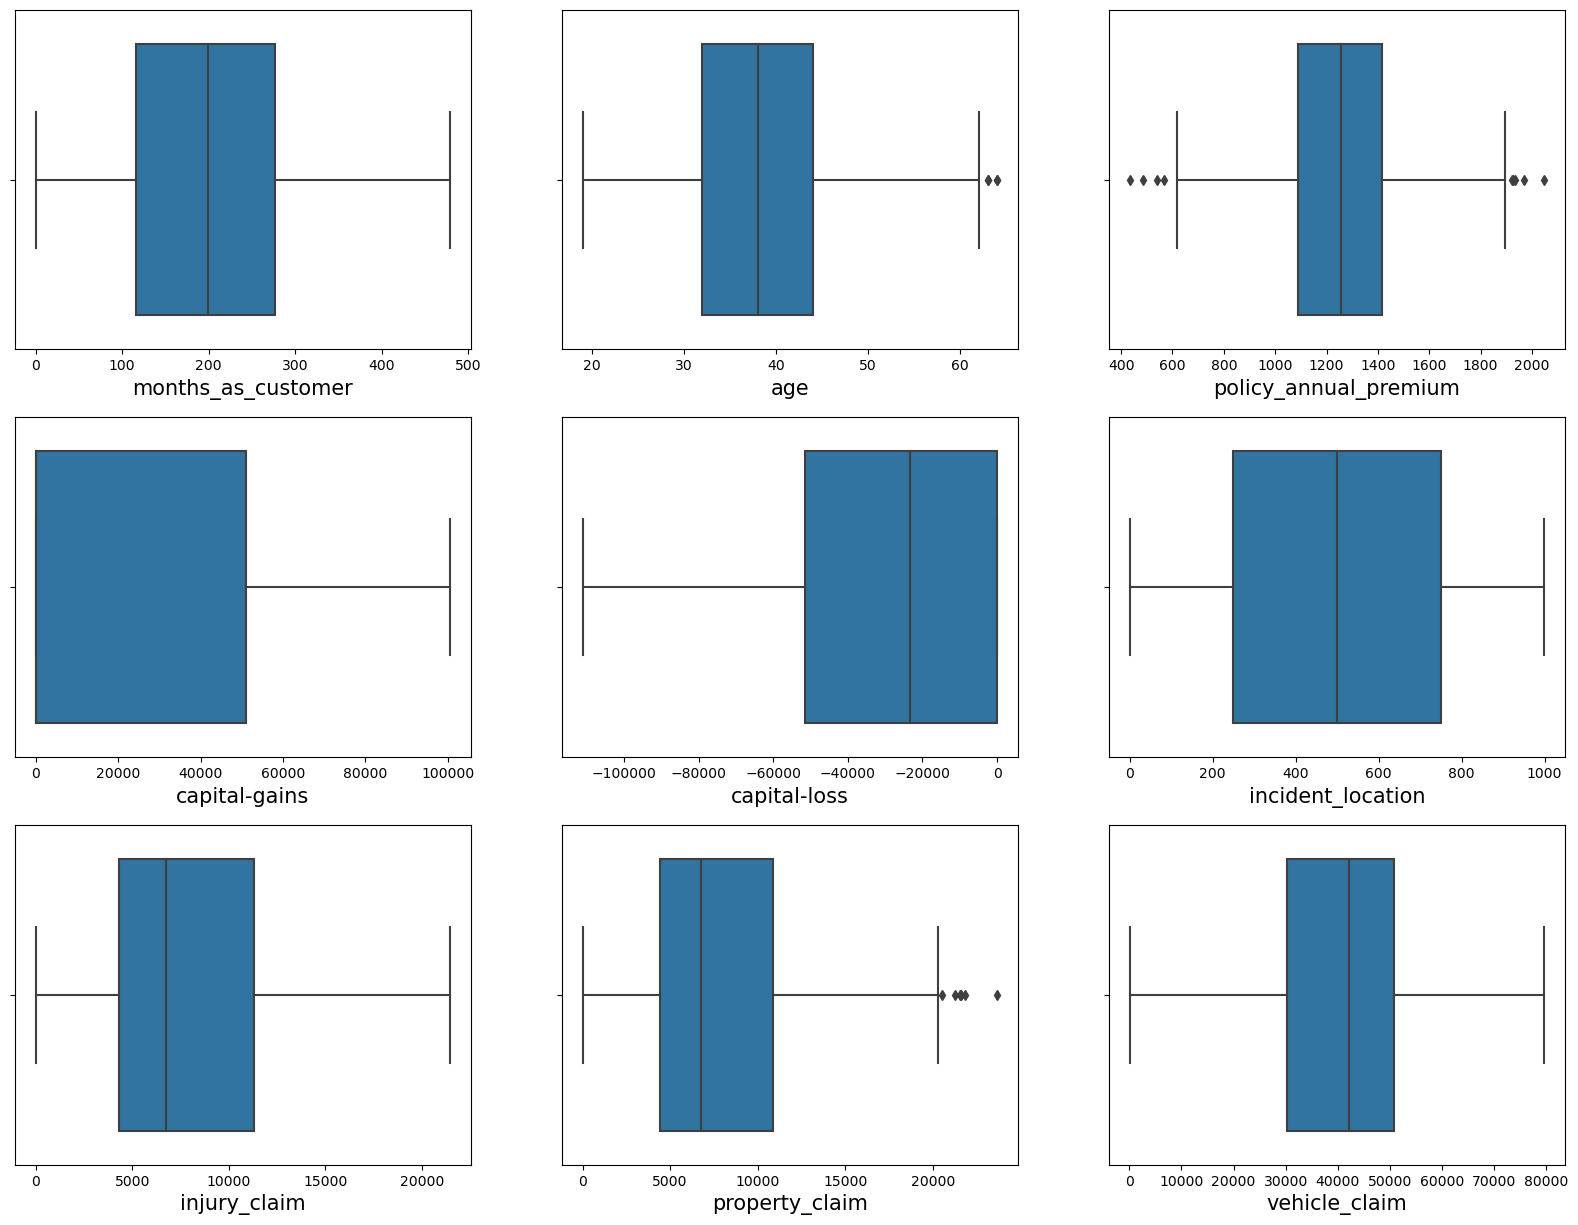

In [18]:
#lets build boxplot to check outliers for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['months_as_customer','age','policy_annual_premium','capital-gains','capital-loss','incident_location','injury_claim','property_claim','vehicle_claim']]:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
Age,property_claim and policy_annual_premium are having outliers

We will delete them later

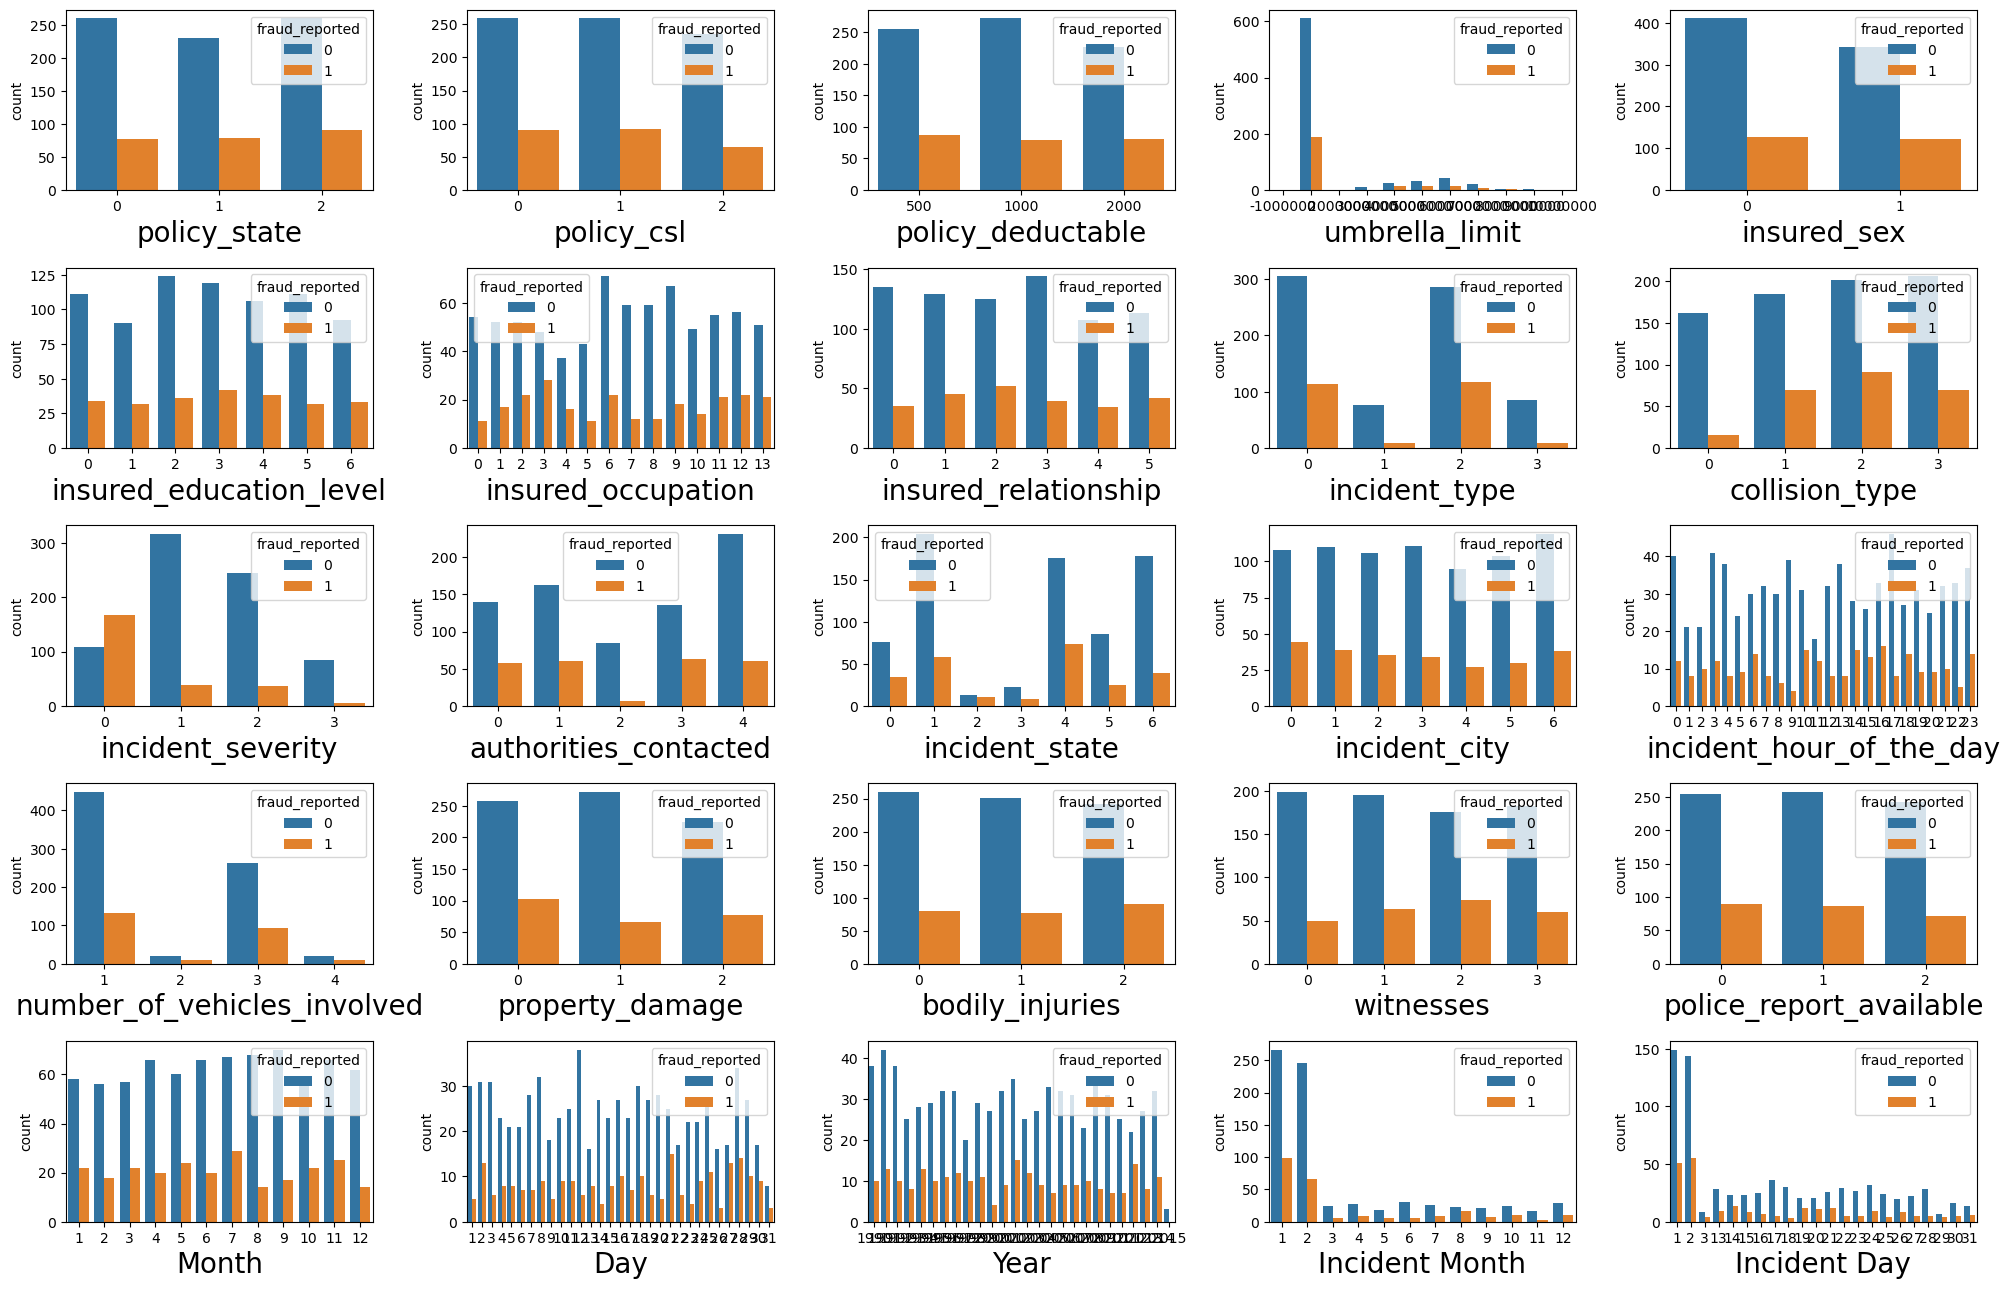

In [19]:
#Let's check count plot for cat variables 

plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['policy_state','policy_csl','policy_deductable','umbrella_limit','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','Month','Day','Year','Incident Month','Incident Day']]:
    if plotnumber<=26:
        ax = plt.subplot(6,5,plotnumber)
        sns.countplot(x=df[col],data=df,hue='fraud_reported')
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
We can observe from above plots that all catg columns are impacting our target column so they are important.

We can see that our 'Incident Year ' column have only one entry so it will impact in same way so i m deleting it

In [20]:
df.drop('Incident Year',axis=1,inplace=True)
df.shape

(1000, 35)

In [21]:
#let's drop outliers using zscore method
from scipy.stats import zscore

In [22]:
col=df[['age','property_claim','policy_annual_premium']]
z_score=np.abs(zscore(col))
np.where(z_score>3)

(array([229, 248, 500, 763], dtype=int64), array([2, 2, 1, 2], dtype=int64))

In [23]:
df1=df[(z_score<3).all(axis=1)]
df1.shape

(996, 35)

In [24]:
#let's check for dataloss
print('Data loss is :',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss is : 0.4


# Observation
Our dataloss is fine , now let's check for skewness

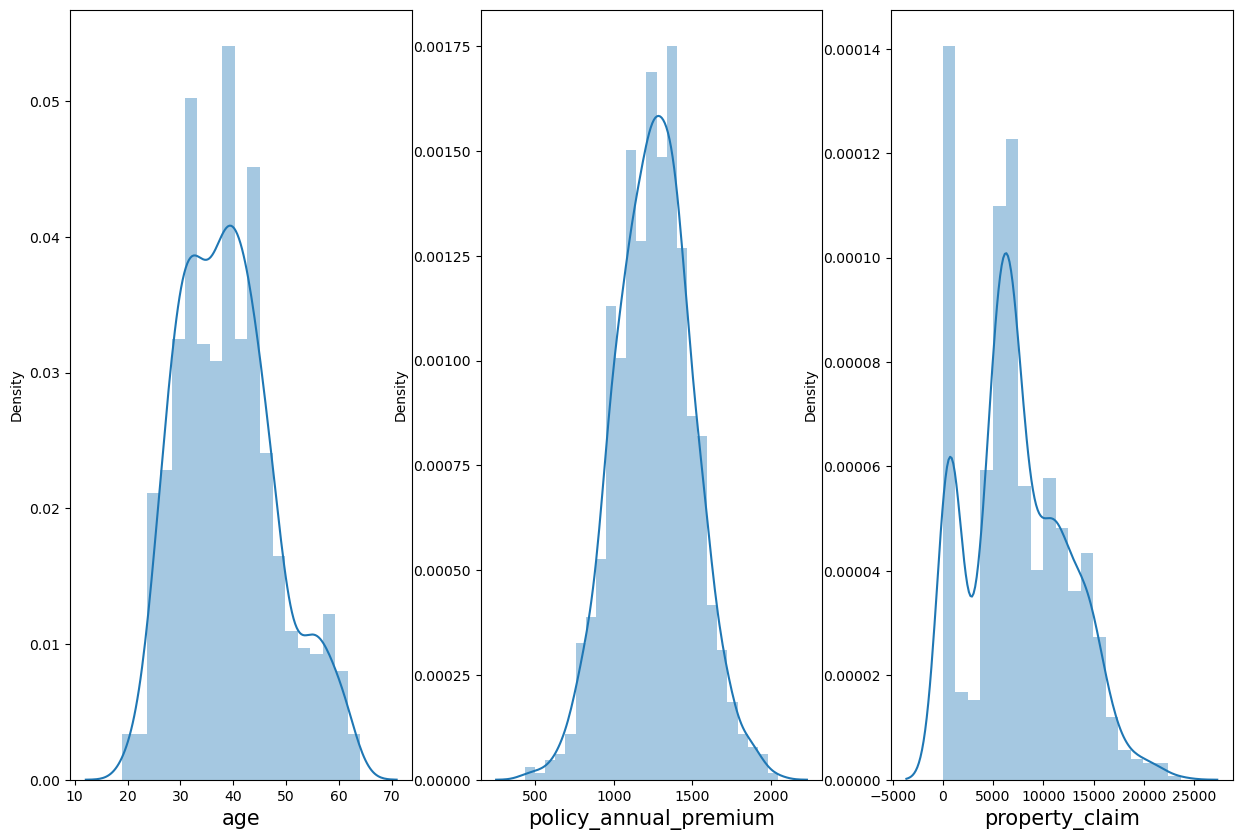

In [25]:
#lets build distplot to check dist for cont columns after removing outliers
plt.figure(figsize=(15,10))
plotnumber=1
for col in df[['age','policy_annual_premium','property_claim']]:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

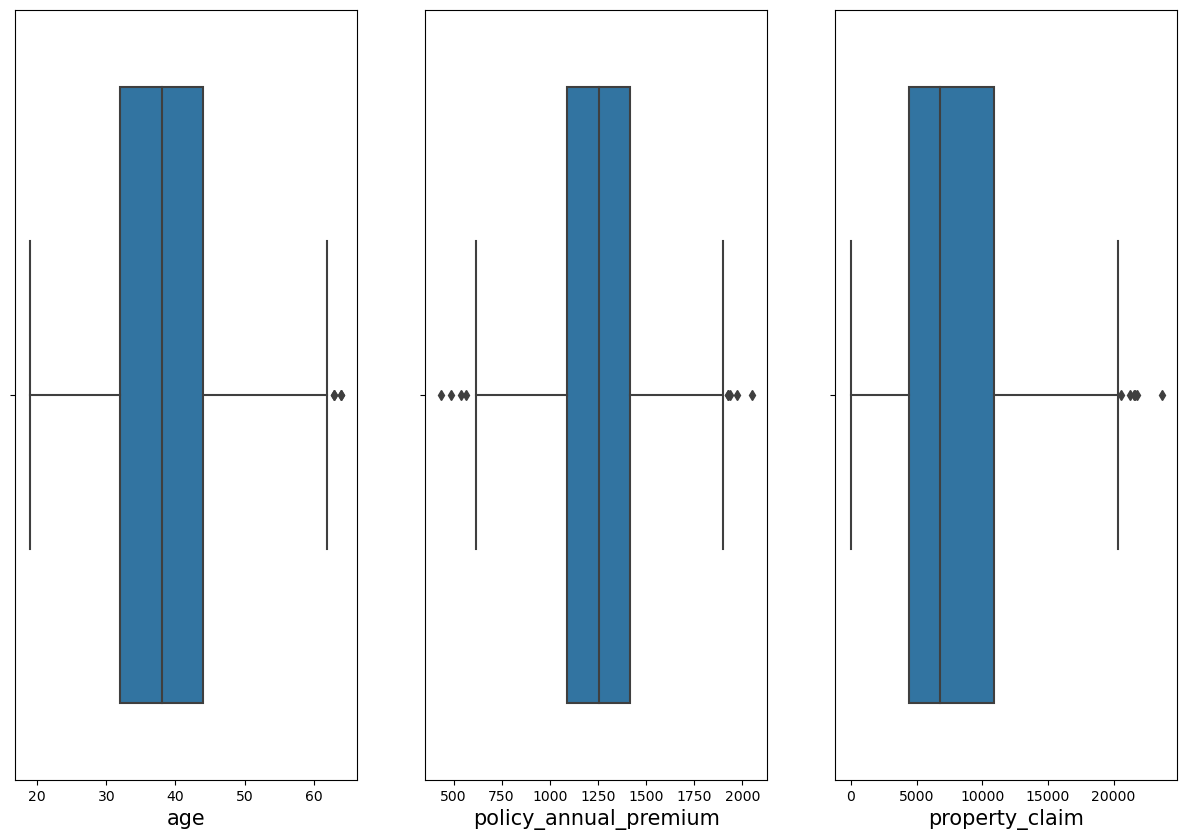

In [26]:
#lets build boxplot  for cont columns after removing outliers
plt.figure(figsize=(15,10))
plotnumber=1
for col in df[['age','policy_annual_premium','property_claim']]:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
Still there are outliers,we will transform them later

In [27]:
df1.skew()

months_as_customer             0.359605
age                            0.474526
policy_state                  -0.028155
policy_csl                     0.092982
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                 1.800271
insured_sex                    0.145176
insured_education_level        0.001349
insured_occupation            -0.063714
insured_relationship           0.076423
capital-gains                  0.478850
capital-loss                  -0.393015
incident_type                  0.102917
collision_type                -0.194059
incident_severity              0.275635
authorities_contacted         -0.120741
incident_state                -0.144616
incident_city                  0.046459
incident_location              0.001140
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
property_damage                0.099361
bodily_injuries                0.011117
witnesses                      0.025758


# Observation
We can see that skewness for our cont columns is in acceptable range i.e -0.5 to 0.5.

so we can proceed ahead 

let's check for corelation

In [28]:
corr=df1.corr()
corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,Month,Day,Year,Incident Month,Incident Day
months_as_customer,1.000000,0.922092,0.000118,-0.022964,0.023512,-0.003378,0.013476,0.059002,-0.000848,0.005365,...,0.021564,0.066416,0.041157,0.062062,0.020966,0.004955,0.054175,-0.046010,0.022949,-0.013502
age,0.922092,1.000000,-0.015182,-0.012429,0.026772,0.005890,0.016438,0.072900,0.001485,0.014030,...,0.017414,0.075480,0.064230,0.061949,0.012408,0.015874,0.054465,-0.035505,0.021773,-0.008174
policy_state,0.000118,-0.015182,1.000000,-0.000349,0.010740,0.014475,-0.030273,-0.019294,-0.032551,-0.031016,...,0.070824,-0.046398,0.002678,-0.000560,0.028864,0.071527,0.001030,-0.005709,0.026176,0.013370
policy_csl,-0.022964,-0.012429,-0.000349,1.000000,0.006149,0.030864,0.023000,-0.008369,0.010380,0.019598,...,-0.000905,-0.080474,-0.048187,-0.048414,-0.038795,-0.044653,0.016531,-0.017664,-0.009992,-0.003879
policy_deductable,0.023512,0.026772,0.010740,0.006149,1.000000,-0.008445,0.009670,-0.011671,0.014571,-0.050024,...,0.032922,0.040337,0.069537,0.006292,0.015833,-0.051368,0.011204,-0.048465,-0.007687,-0.018867
policy_annual_premium,-0.003378,0.005890,0.014475,0.030864,-0.008445,1.000000,-0.008782,0.041830,-0.021475,0.030963,...,0.020134,-0.024031,-0.007964,0.013198,-0.010174,-0.028452,-0.030886,0.001650,0.011257,0.016400
umbrella_limit,0.013476,0.016438,-0.030273,0.023000,0.009670,-0.008782,1.000000,0.009888,-0.019108,0.021730,...,-0.054807,-0.044971,-0.022584,-0.038519,0.058781,0.009382,-0.044483,0.049368,0.042425,-0.022953
insured_sex,0.059002,0.072900,-0.019294,-0.008369,-0.011671,0.041830,0.009888,1.000000,0.007473,-0.009257,...,0.023303,0.004603,-0.009457,-0.025778,0.032173,-0.007259,0.045694,-0.031981,0.025010,-0.007249
insured_education_level,-0.000848,0.001485,-0.032551,0.010380,0.014571,-0.021475,-0.019108,0.007473,1.000000,-0.021502,...,0.037448,0.083672,0.058663,0.070110,0.011520,-0.007489,0.014464,0.017801,0.074139,-0.055411
insured_occupation,0.005365,0.014030,-0.031016,0.019598,-0.050024,0.030963,0.021730,-0.009257,-0.021502,1.000000,...,-0.007498,0.022693,0.008301,0.000977,0.003335,0.024516,-0.003030,-0.025282,0.018472,-0.022786


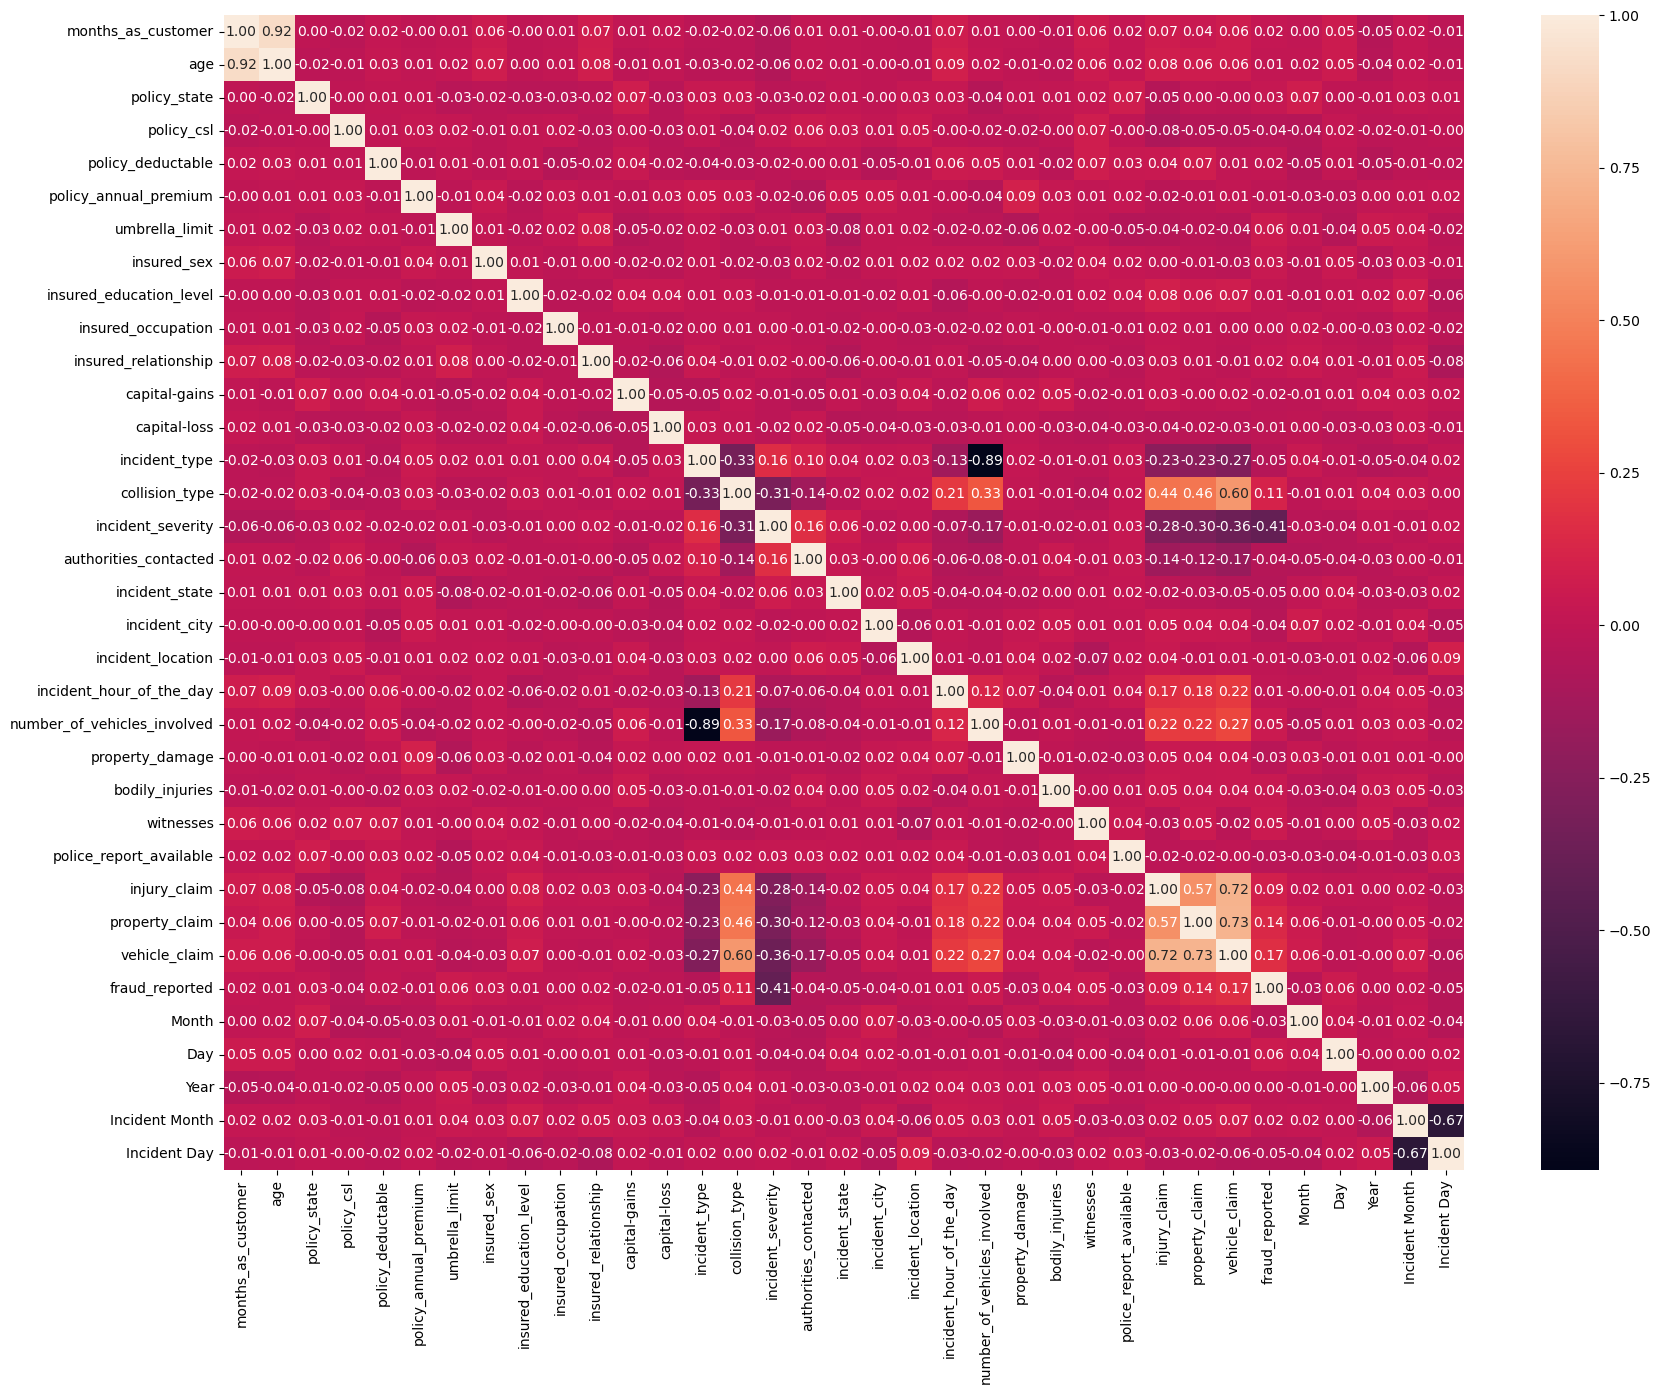

In [29]:
#let's visualize using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,fmt='0.2f')
plt.show()

# Observation
1.We can see that insured_occupation and Year column are not impacting much our target column.

2.Number of vehicles involved and incident type are in very high negative corelation.

3.collision type,property_claim,vehicle_claim etc are positively impacting our target column,and some columns are negatively impacting our target column 

We can visualize other relations as well

In [30]:
#let's drop less impacting columns
df1.drop(columns=['insured_occupation','Year'],axis=1,inplace=True)
df1.shape

(996, 33)

In [31]:
#let's separate features and label
X=df1.drop(columns=['fraud_reported'],axis=1)
y=df1['fraud_reported']

In [32]:
#Let's standarize our data
from sklearn.preprocessing import StandardScaler

In [33]:
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,Month,Day,Incident Month,Incident Day
0,1.074671,0.987190,1.186130,0.063660,-0.224722,0.621371,-0.480660,1.075102,0.531088,-1.436113,...,0.007356,0.466826,1.272449,-0.188161,1.174449,0.750488,1.013751,0.177487,-0.735300,1.139807
1,0.204846,0.330455,-0.018137,0.063660,1.409024,-0.251375,1.693441,1.075102,0.531088,-0.246617,...,-1.213749,-1.335340,-1.195631,-1.363038,-1.376935,-1.824061,-0.166145,1.309223,-0.735300,0.756374
2,-0.612790,-1.092470,1.186130,-1.179582,1.409024,0.647301,1.693441,-0.930144,1.557206,0.348131,...,1.228462,1.367910,0.038409,0.055836,-0.737005,-0.785654,-0.166145,-0.727901,-0.429896,0.852233
3,0.448397,0.221000,-1.222403,0.063660,1.409024,0.658123,2.128261,-0.930144,1.557206,0.942878,...,0.007356,0.466826,0.038409,-0.223018,-0.217973,0.678398,-0.461119,1.082875,2.013335,-1.160788
4,0.204846,0.549367,-1.222403,1.306902,-0.224722,1.358059,2.128261,1.075102,-1.521148,0.942878,...,-1.213749,-0.434257,0.038409,-1.256417,-1.404033,-1.768934,-0.166145,-1.067422,-0.429896,0.372942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,-1.752261,-0.107368,1.186130,1.306902,-0.224722,0.221354,-0.480660,-0.930144,1.044147,0.942878,...,-1.213749,-0.434257,-1.195631,2.052922,0.278129,1.225430,0.128829,0.064313,-0.429896,0.852233
992,0.700646,0.221000,-1.222403,-1.179582,-0.224722,0.745734,-0.480660,-0.930144,1.557206,1.537626,...,1.228462,1.367910,-1.195631,2.184148,2.229188,1.823349,-0.461119,-1.633290,-0.735300,1.043949
993,-0.647583,-0.545191,1.186130,0.063660,-1.041595,0.523896,0.823801,-0.930144,1.044147,-0.246617,...,1.228462,1.367910,1.272449,0.014828,0.023825,0.772751,-1.346040,0.177487,-0.735300,0.948091
994,2.205443,2.519571,-1.222403,1.306902,1.409024,0.413309,1.693441,1.075102,-1.521148,1.537626,...,-1.213749,-0.434257,1.272449,-0.452662,-0.451433,-0.073241,1.308724,0.290661,-0.429896,1.235665


In [34]:
#checking multicollinerity problem using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range (X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,6.802584,months_as_customer
1,6.837245,age
2,1.036417,policy_state
3,1.027059,policy_csl
4,1.037770,policy_deductable
5,1.036703,policy_annual_premium
6,1.032200,umbrella_limit
7,1.026043,insured_sex
8,1.031948,insured_education_level
9,1.039952,insured_relationship


# Observation
All our columns have vif value within threshold value i.e 10 ,it means there is no multicollinearity issue

Let's check for feature selection tech

In [36]:
from sklearn.feature_selection import SelectKBest,f_classif

In [37]:
best=SelectKBest(score_func=f_classif,k=32)
fit=best.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature=pd.concat([df_columns,df_scores],axis=1)
feature.columns=['feat_name','Score']
print(feature.nlargest(32,'Score'))

                      feat_name       Score
14            incident_severity  195.361320
27                vehicle_claim   29.793150
26               property_claim   19.460535
13               collision_type   12.559185
25                 injury_claim    8.099000
29                          Day    3.562059
6                umbrella_limit    3.446357
16               incident_state    2.646854
23                    witnesses    2.621027
20  number_of_vehicles_involved    2.354487
31                 Incident Day    2.313396
12                incident_type    2.281139
15        authorities_contacted    1.899728
3                    policy_csl    1.498303
17                incident_city    1.479034
22              bodily_injuries    1.253161
7                   insured_sex    1.029938
28                        Month    0.973990
21              property_damage    0.932175
24      police_report_available    0.878530
2                  policy_state    0.828830
0            months_as_customer 

# Observation
Incident location and incident hour of the day are showing very less score so lets delete them

In [38]:
X.drop(columns=['incident_location','incident_hour_of_the_day'],axis=1,inplace=True)
X.shape

(996, 30)

In [39]:
y.value_counts()#checking data balance

0    750
1    246
Name: fraud_reported, dtype: int64

# Obervation
our ratio of classes is approx 75;25 so i m considering it as balanced dataset

now we can proceed ahead for modelling

# Modelling

In [40]:
#creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=206)

In [41]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [42]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [43]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [44]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:80.46%

===Test Result====
Accuracy Score:75.90%


Test Classification Report
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       185
           1       0.55      0.38      0.44        64

    accuracy                           0.76       249
   macro avg       0.68      0.63      0.65       249
weighted avg       0.74      0.76      0.74       249



In [45]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:80.05%

===Test Result====
Accuracy Score:70.68%


Test Classification Report
               precision    recall  f1-score   support

           0       0.75      0.92      0.82       185
           1       0.29      0.09      0.14        64

    accuracy                           0.71       249
   macro avg       0.52      0.51      0.48       249
weighted avg       0.63      0.71      0.65       249



In [47]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:72.29%


Test Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       185
           1       0.46      0.45      0.46        64

    accuracy                           0.72       249
   macro avg       0.64      0.63      0.64       249
weighted avg       0.72      0.72      0.72       249



In [49]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [50]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:98.53%

===Test Result====
Accuracy Score:77.91%


Test Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       185
           1       0.60      0.41      0.49        64

    accuracy                           0.78       249
   macro avg       0.71      0.66      0.67       249
weighted avg       0.76      0.78      0.76       249



In [51]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:77.51%


Test Classification Report
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       185
           1       0.62      0.33      0.43        64

    accuracy                           0.78       249
   macro avg       0.71      0.63      0.64       249
weighted avg       0.75      0.78      0.75       249



In [53]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [54]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:84.47%

===Test Result====
Accuracy Score:76.31%


Test Classification Report
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       185
           1       0.55      0.45      0.50        64

    accuracy                           0.76       249
   macro avg       0.68      0.66      0.67       249
weighted avg       0.75      0.76      0.76       249



In [55]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [56]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:93.98%

===Test Result====
Accuracy Score:77.51%


Test Classification Report
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       185
           1       0.59      0.42      0.49        64

    accuracy                           0.78       249
   macro avg       0.70      0.66      0.67       249
weighted avg       0.76      0.78      0.76       249



In [57]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [58]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:87.95%

===Test Result====
Accuracy Score:75.50%


Test Classification Report
               precision    recall  f1-score   support

           0       0.76      0.97      0.86       185
           1       0.62      0.12      0.21        64

    accuracy                           0.76       249
   macro avg       0.69      0.55      0.53       249
weighted avg       0.72      0.76      0.69       249



In [59]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:79.52%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       185
           1       0.62      0.52      0.56        64

    accuracy                           0.80       249
   macro avg       0.73      0.70      0.72       249
weighted avg       0.79      0.80      0.79       249



# Observation
As per our model performance , XGB Classifier is giving best results with an accuracy score of 79.52%.

Let's validate our score with cross val method

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
#lets check for log model
pred=log.predict(x_test)
score=cross_val_score(log,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred)-score)

Difference is ; -0.026084458436762215


In [63]:
#now lets check for knn model
pred2=knn.predict(x_test)
score2=cross_val_score(knn,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; -0.043152590260539636


In [64]:
#now lets check for decision tree model
pred3=tree.predict(x_test)
score3=cross_val_score(tree,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; 0.01913277229521093


In [65]:
#now lets check for bagging model
pred4=bag.predict(x_test)
score4=cross_val_score(bag,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; 0.004010938225262994


In [66]:
#now lets check for random forest model
pred5=rand.predict(x_test)
score5=cross_val_score(rand,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; 0.0030099493451191117


In [67]:
#now lets check for ada boost model
pred6=ada.predict(x_test)
score6=cross_val_score(ada,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; -0.017068394179733937


In [68]:
#now lets check for gradient boost model
pred7=grad.predict(x_test)
score7=cross_val_score(grad,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; -0.000980000403624559


In [69]:
#now lets check for SVC model
pred8=support.predict(x_test)
score8=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; 0.0030351556981695893


In [70]:
#now lets check for xgb model
pred9=model.predict(x_test)
score9=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred9)-score9)

Difference is ; 0.04319579826845077


# Observation
According to cross val score both our models that is random forest classifier and support vector classifier are giving same results.

So i m choosing SVC as my final model and best model.

let's use tuning tech to improve our score

In [71]:
from sklearn.model_selection import GridSearchCV

In [91]:
params={
       'C':[1,5,7,10,15,18,20,28],
       'gamma':[0.01,0.001,0.1,0.003,0.2,0.002],
       } 
grd=GridSearchCV(support,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'C': 28, 'gamma': 0.002}


In [92]:
final=grd.best_estimator_
final.fit(x_train,y_train)

SVC(C=28, gamma=0.002)

In [93]:
metric_score(final,x_train,x_test,y_train,y_test,train=True)
metric_score(final,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:85.27%

===Test Result====
Accuracy Score:76.71%


Test Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       185
           1       0.57      0.39      0.46        64

    accuracy                           0.77       249
   macro avg       0.69      0.64      0.66       249
weighted avg       0.75      0.77      0.75       249



# After using tuning tech our score is increased,hence SVC model is our best model

In [94]:
from sklearn.metrics import roc_curve,roc_auc_score

In [95]:
fpr,tpr,thresholds=roc_curve(y_test,pred8)

In [96]:
print('threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False Positive Rate=',fpr)

threshold= [2 1 0]
True Positive Rate= [0.    0.125 1.   ]
False Positive Rate= [0.         0.02702703 1.        ]


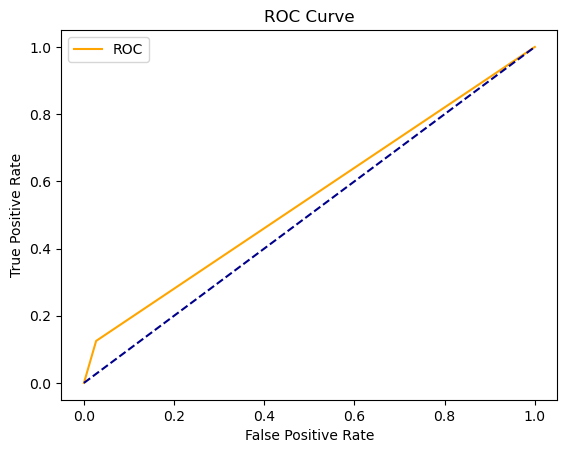

In [97]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

In [98]:
#Let's check auc score
auc_score=roc_auc_score(y_test,pred8)
print(auc_score*100)

54.89864864864865


In [99]:
#now lets save model using joblib
import joblib

In [100]:
joblib.dump(final,'InsuranceClaimPredictionModel.obj')

['InsuranceClaimPredictionModel.obj']